In [223]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [224]:
train=pd.read_excel('C:/Users/dravi/Desktop/Lenovo backup/swathi/Datasets/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
test=pd.read_excel('C:/Users/dravi/Desktop/Lenovo backup/swathi/Datasets/Flight_Ticket_Participant_Datasets/Test_Set.xlsx')

In [225]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [226]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [227]:
train.shape

(10683, 11)

In [228]:
test.shape

(2671, 10)

In [229]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [230]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


Train dataset has 10683 rows and 11 columns. Test dataset has 2671 rows and 10 columns.

'Price' is the target column and the rest are features. Except for the target column which is int rest are object type. It would be useful 
if we convert 'Date_of_Journey','Dep_Time' and 'Arrival_Time' to datetime type.

# Missing Values

In [231]:
#Check for missing data
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [232]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

train data has 2 missing values.As it is only 2 values,they can be dropped.

In [233]:
#Drop the null values
train.dropna(axis=0,how='any',inplace=True)
train.shape

(10682, 11)

In [234]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

There is no misssing data now

In [235]:
#Convert 'Date_of_Journey','Dep_Time' and 'Arrival_Time' to datetime type.
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    train[i]=pd.to_datetime(train[i])
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    test[i]=pd.to_datetime(test[i])


In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null datetime64[ns]
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null datetime64[ns]
Arrival_Time       10682 non-null datetime64[ns]
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [237]:
#Extract the month and day from the 'Date_of_Journey' into separate columns
train['Month_of_Journey']=train['Date_of_Journey'].dt.month
train['Day_of_Journey']=train['Date_of_Journey'].dt.day
test['Month_of_Journey']=test['Date_of_Journey'].dt.month
test['Day_of_Journey']=test['Date_of_Journey'].dt.day

Day of the week might also effect the flight price, prices can be higher on weekends than on weekdays.So extract the day of the week from 
Date of Journey.

In [238]:
train['Weekday_Journey']=train['Date_of_Journey'].dt.weekday
test['Weekday_Journey']=test['Date_of_Journey'].dt.weekday
#the result of this is from 0 to 6, 0 representing Monday and 6 Sunday

In [239]:
train['ArrivalTime_Hour']=train['Arrival_Time'].dt.hour
train['DepTime_Hour']=train['Dep_Time'].dt.hour

Though we extracted day of the month from Date of Journey,it might not be as useful as day of the week.Drop 'Day_of_Journey'. Also drop
'Date_of_Journey','Arrival_Time','Dep_Time' as we have extracted the required data into separate columns.


In [240]:
train.drop(columns=['Date_of_Journey','Day_of_Journey','Arrival_Time','Dep_Time'],axis=1,inplace=True)
test.drop(columns=['Date_of_Journey','Day_of_Journey','Arrival_Time','Dep_Time'],axis=1,inplace=True)

In [241]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,6,1,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,4,4,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,3,23,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,21,16


In [242]:
train.tail()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,2,22,19
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,5,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,5,11,8
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,14,11
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,8h 20m,2 stops,No info,11753,9,3,19,10


In [243]:
#Convert 'Duration' to hours
train['Duration']=train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test['Duration']=test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)


In [244]:
train['Duration']=round(train['Duration']/60,2)
test['Duration']=round(test['Duration']/60,2)

Remove 'Route' column as it indicates the same outcome as 'Total_Stops'

In [245]:
train.drop(columns='Route',axis=1,inplace=True)
test.drop(columns='Route',axis=1,inplace=True)

In [246]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour
0,IndiGo,Banglore,New Delhi,2.83,non-stop,No info,3897,3,6,1,22
1,Air India,Kolkata,Banglore,7.42,2 stops,No info,7662,1,5,13,5
2,Jet Airways,Delhi,Cochin,19.00,2 stops,No info,13882,9,4,4,9
3,IndiGo,Kolkata,Banglore,5.42,1 stop,No info,6218,12,3,23,18
4,IndiGo,Banglore,New Delhi,4.75,1 stop,No info,13302,1,3,21,16


In [247]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [248]:
#Extract the number from 'Total_Stops' column
train['Total_Stops']=train['Total_Stops'].str.extract('(\d+)')

In [249]:
train['Total_Stops'].isnull().sum()

3491

In [250]:
#Fill the 'non stop' as 0 
train['Total_Stops'].fillna(0,inplace=True)

In [251]:
test['Total_Stops']=test['Total_Stops'].str.extract('(\d+)')
test['Total_Stops'].fillna(0,inplace=True)

Check the 'Additional_Info' column

In [252]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [253]:
test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

'No info' is repeated,replace them

In [254]:
train['Additional_Info'].replace({'No Info':'No info'},inplace=True)

Finally after doing feature engineering the dataset looks like and the columns are

In [255]:
train.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month_of_Journey', 'Weekday_Journey',
       'ArrivalTime_Hour', 'DepTime_Hour'],
      dtype='object')

In [256]:
train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour
0,IndiGo,Banglore,New Delhi,2.83,0,No info,3897,3,6,1,22
1,Air India,Kolkata,Banglore,7.42,2,No info,7662,1,5,13,5
2,Jet Airways,Delhi,Cochin,19.00,2,No info,13882,9,4,4,9
3,IndiGo,Kolkata,Banglore,5.42,1,No info,6218,12,3,23,18
4,IndiGo,Banglore,New Delhi,4.75,1,No info,13302,1,3,21,16


# Data Visualisation

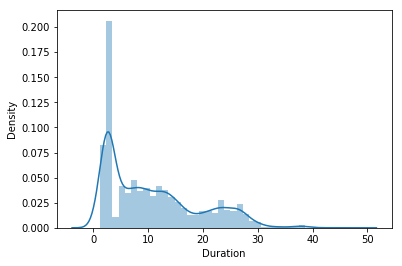

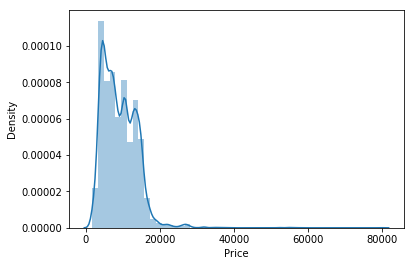

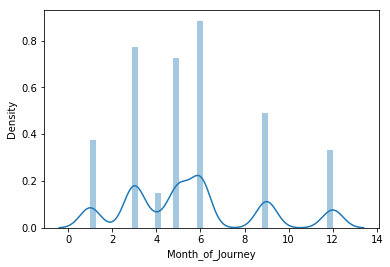

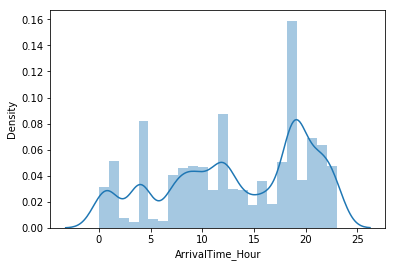

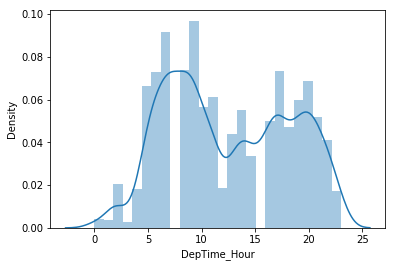

In [257]:
#Check the distribution of continous data columns
list_cont=['Duration','Price','Month_of_Journey','ArrivalTime_Hour','DepTime_Hour']
for i in list_cont:
    plt.subplots(1,1)
    sns.distplot(train[i],kde=True)
    

Gaussian Distribution is seen but the data is skewed

Visualise the categorical columns

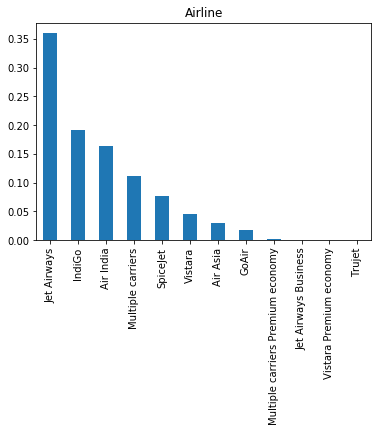

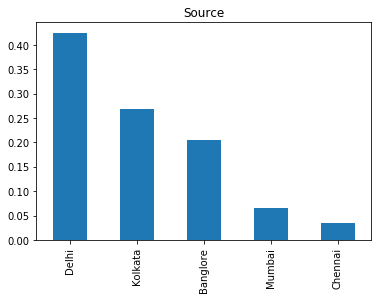

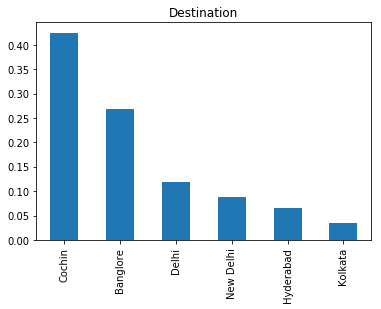

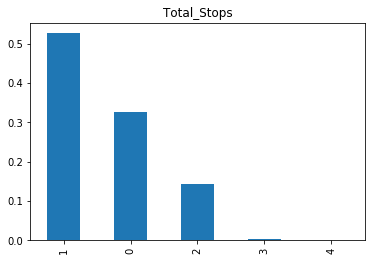

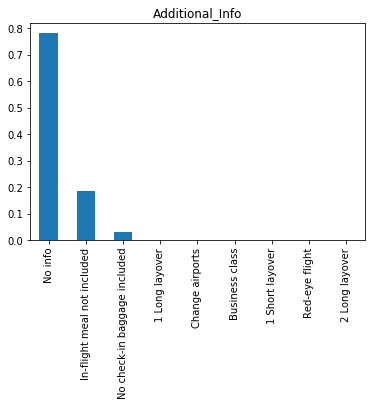

In [258]:
list_cat=['Airline','Source','Destination', 'Total_Stops', 'Additional_Info']
for i in list_cat:
    plt.subplots(1,1)
    train[i].value_counts(normalize=True).plot(kind='bar')
    plt.title(i)

It can be seen that Jet Airways has the most number of customers.

Visualise the effect of different features on target variable

In [259]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline             10682 non-null object
Source              10682 non-null object
Destination         10682 non-null object
Duration            10682 non-null float64
Total_Stops         10682 non-null object
Additional_Info     10682 non-null object
Price               10682 non-null int64
Month_of_Journey    10682 non-null int64
Weekday_Journey     10682 non-null int64
ArrivalTime_Hour    10682 non-null int64
DepTime_Hour        10682 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 1001.4+ KB


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

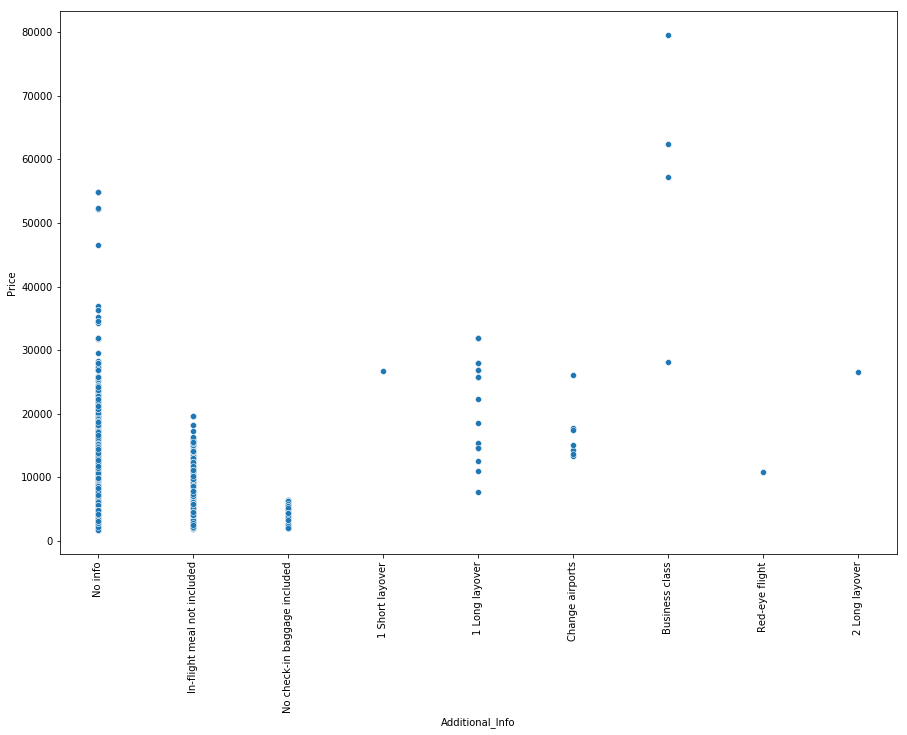

In [260]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Additional_Info',y='Price',data=train)
plt.xticks(rotation=90)

It can be seen that business class has higher price. Additional info has an effect on price.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

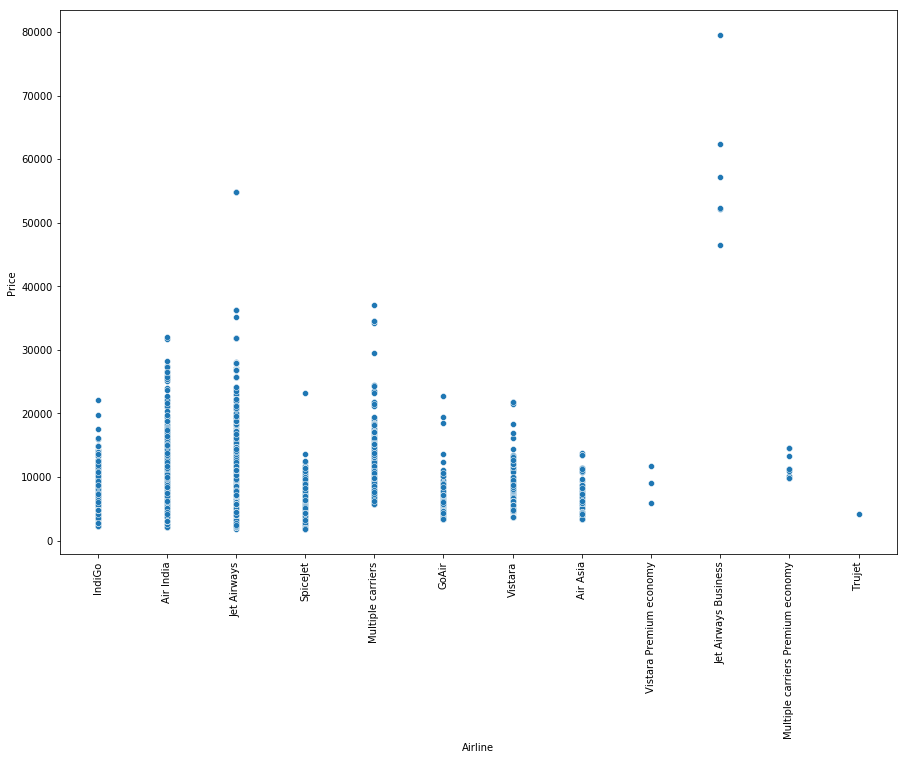

In [261]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Airline',y='Price',data=train)
plt.xticks(rotation=90)

It can be seen that there is difference in price from airline to airline.

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

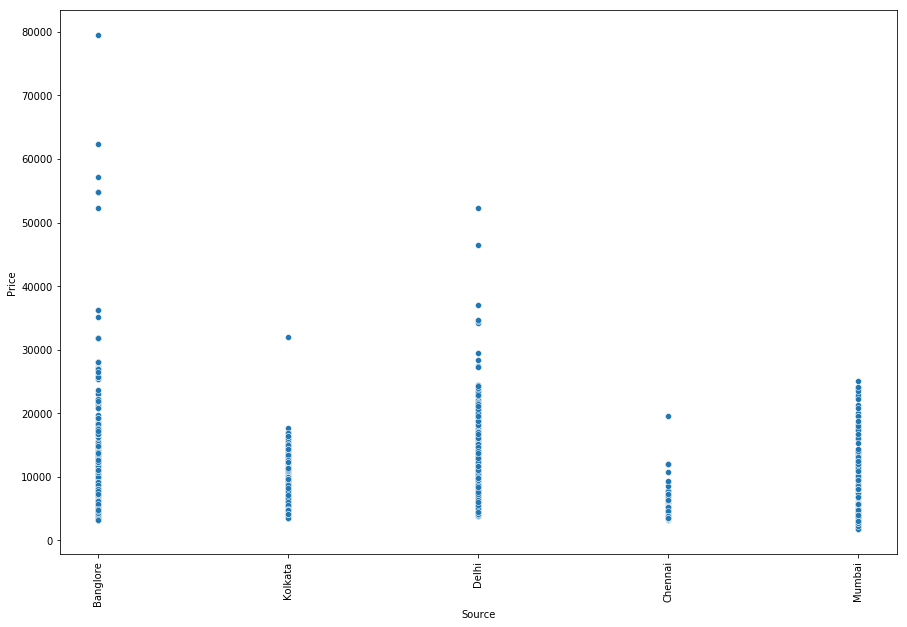

In [262]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Source',y='Price',data=train)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

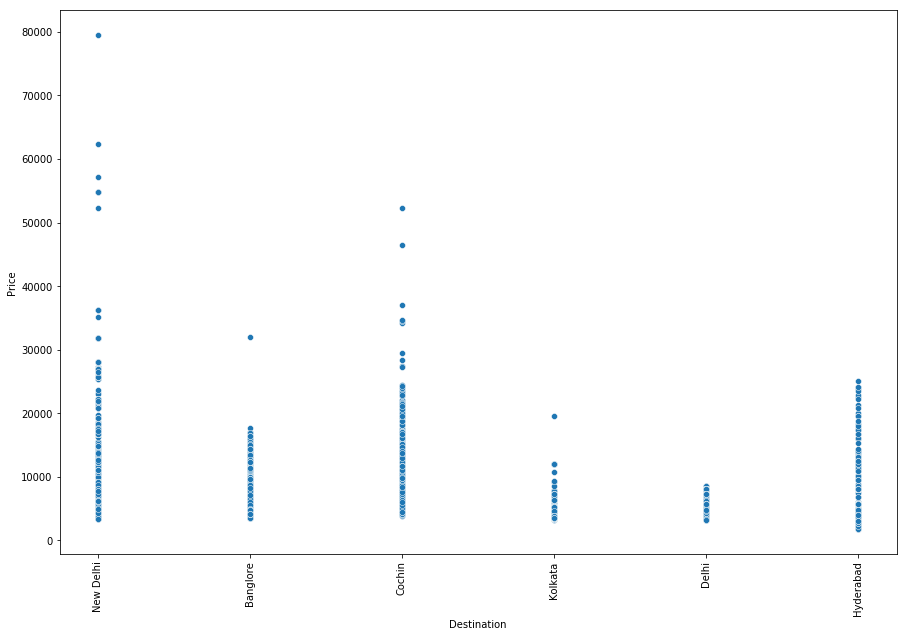

In [263]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Destination',y='Price',data=train)
plt.xticks(rotation=90)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

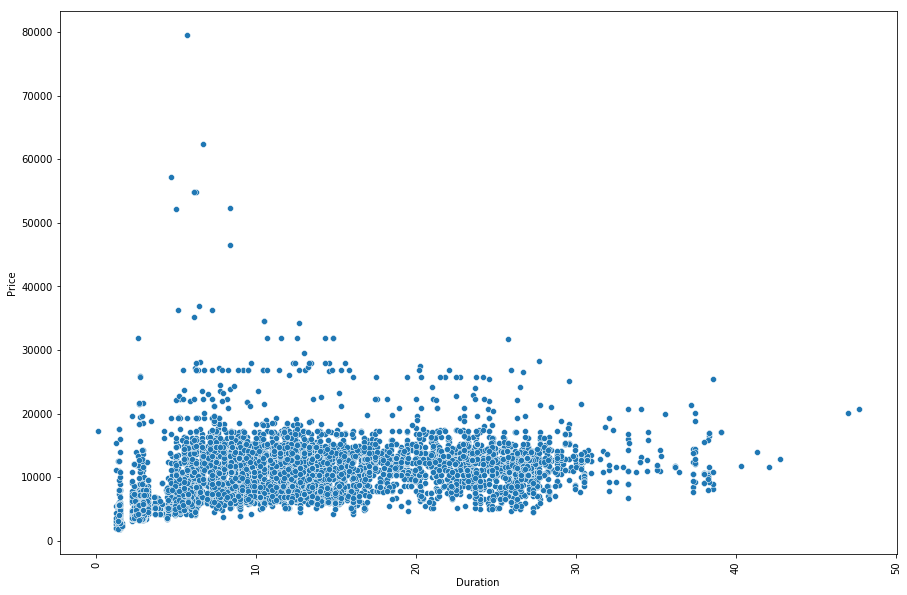

In [264]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Duration',y='Price',data=train)
plt.xticks(rotation=90)

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]),
 <a list of 11 Text xticklabel objects>)

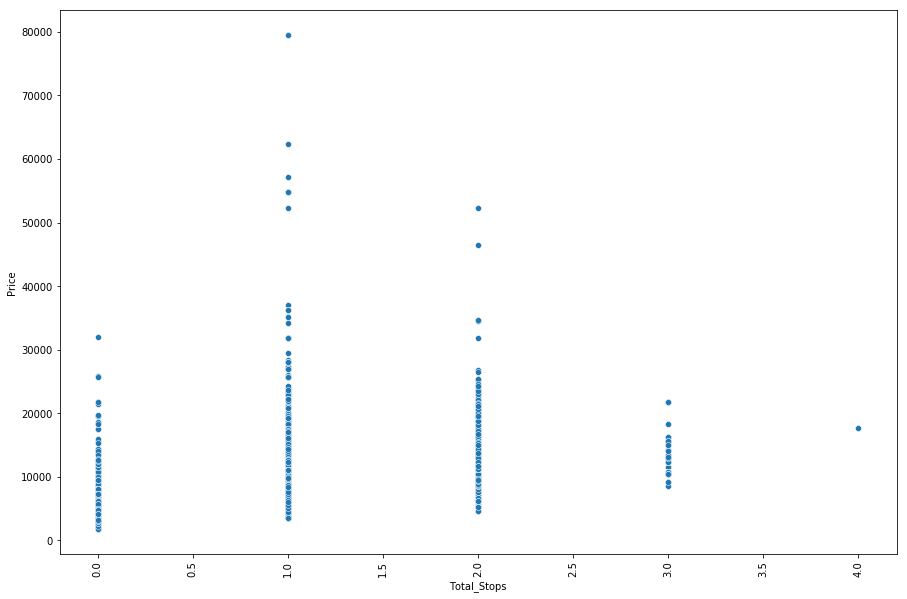

In [265]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total_Stops',y='Price',data=train)
plt.xticks(rotation=90)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

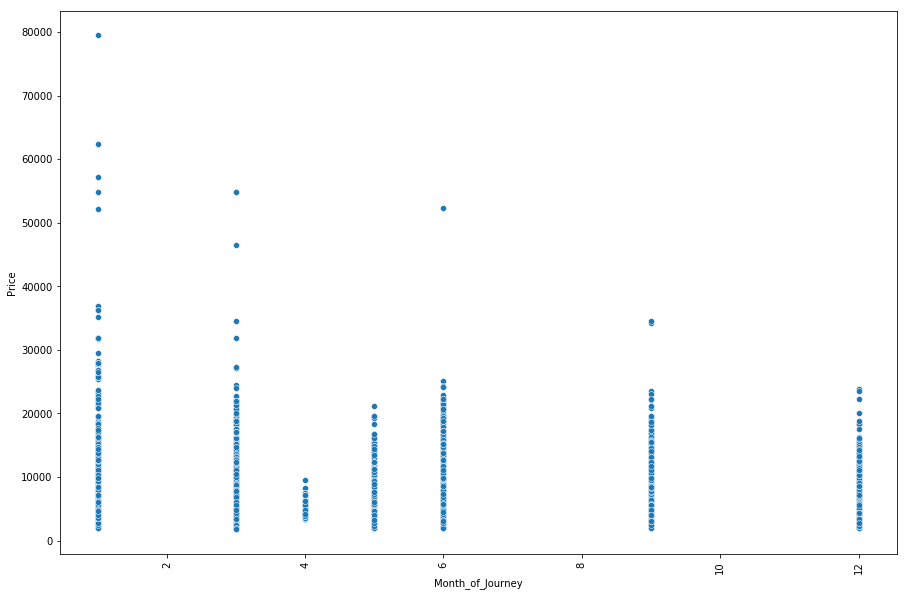

In [266]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Month_of_Journey',y='Price',data=train)
plt.xticks(rotation=90)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 9 Text xticklabel objects>)

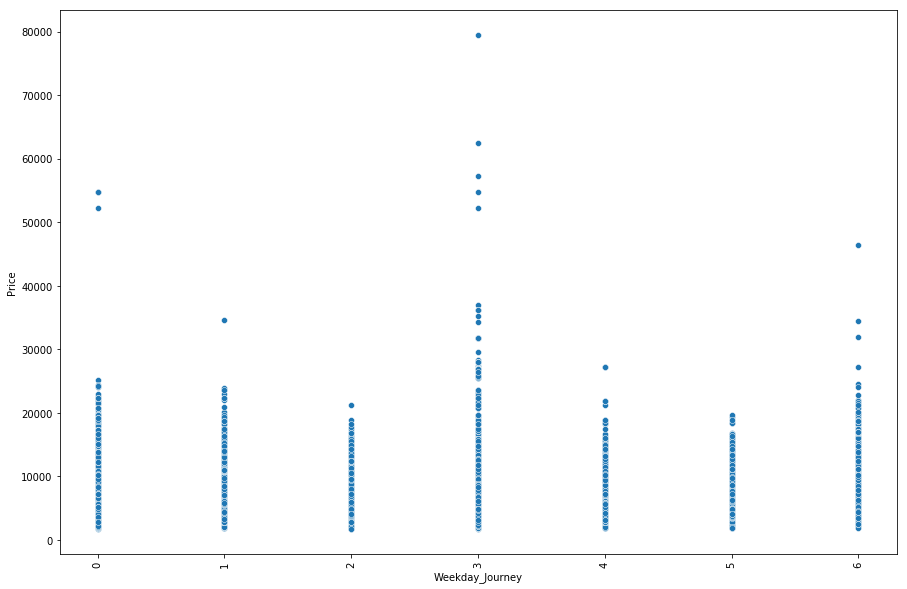

In [267]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Weekday_Journey',y='Price',data=train)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

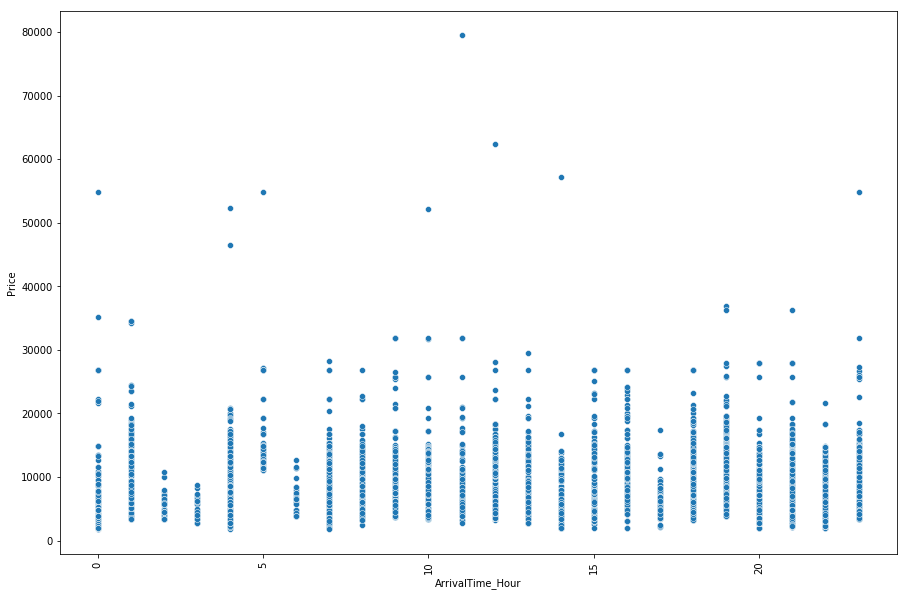

In [268]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='ArrivalTime_Hour',y='Price',data=train)
plt.xticks(rotation=90)

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text xticklabel objects>)

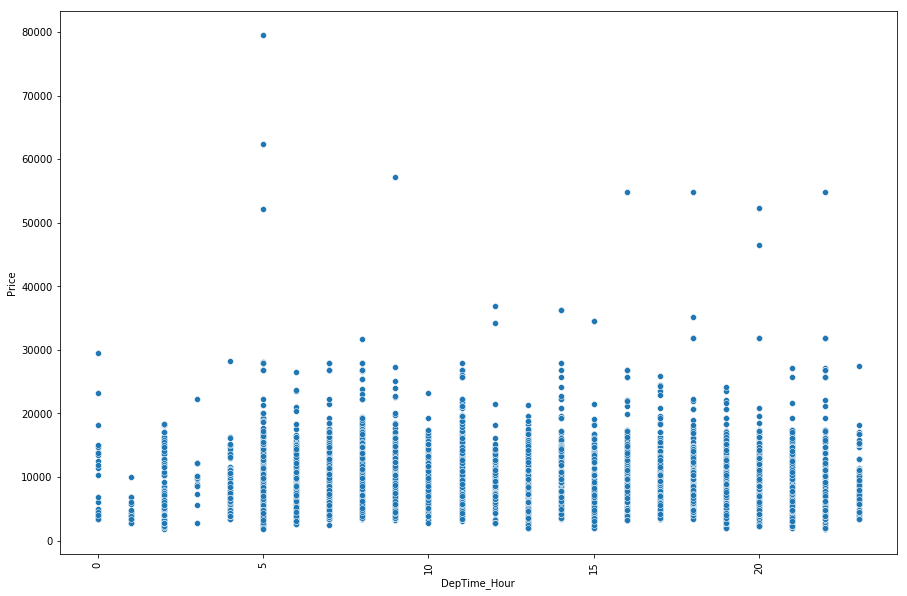

In [269]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='DepTime_Hour',y='Price',data=train)
plt.xticks(rotation=90)

It can be seen that all the features to some extent have an effect on Price

# Checking for Outliers

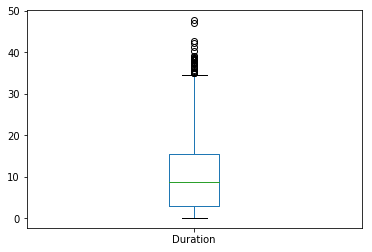

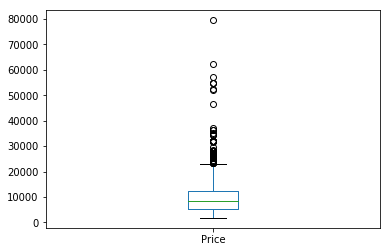

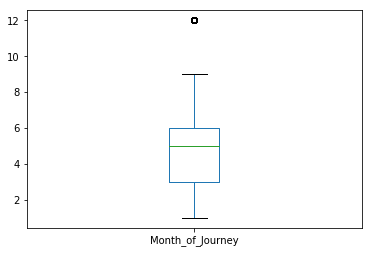

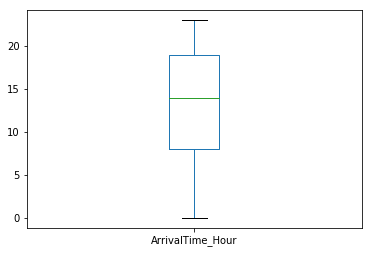

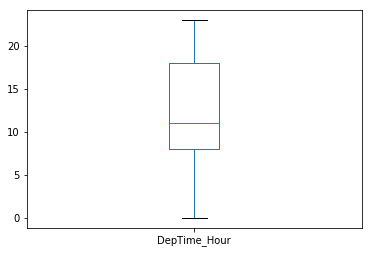

In [271]:
for i in list_cont:
    plt.subplots(1,1)
    train[i].plot.box()

There are outliers in the 'Duration' and 'Price' columns. But it si not justifiable to remove them (Duration is more when there are more stops 
                                                                                                   and the price will be more)

# Skewness

In [272]:
train.skew()

Duration            0.861338
Price               1.812405
Month_of_Journey    0.629556
Weekday_Journey    -0.000147
ArrivalTime_Hour   -0.370146
DepTime_Hour        0.112924
dtype: float64

Taking +/-0.65 as threshold,'Duration' is skewed. 'Price' is target variable

Try Log transformation with 'Duration' column

In [273]:
train['Duration']=np.log(train['Duration'])

In [274]:
test['Duration']=np.log(test['Duration'])

In [275]:
train.skew()

Duration           -0.174163
Price               1.812405
Month_of_Journey    0.629556
Weekday_Journey    -0.000147
ArrivalTime_Hour   -0.370146
DepTime_Hour        0.112924
dtype: float64

# Encoding 

'Airline','Source','Destination', 'Additional_Info' are nominal categorical variables.One hot encoding can be done.

In [278]:
train['Airline'].nunique()

12

In [279]:
test['Airline'].nunique()

11

In [280]:
train['Source'].nunique()

5

In [281]:
test['Source'].nunique()

5

In [282]:
train['Destination'].nunique()

6

In [283]:
test['Destination'].nunique()

6

In [284]:
train['Additional_Info'].nunique()

9

In [285]:
test['Additional_Info'].nunique()

6

In [159]:
train_dummies=[]
test_dummies=[]
for j in ['Airline','Source','Destination', 'Additional_Info']:
    train_dummies.append(pd.get_dummies(train[j],drop_first=True, prefix = j, prefix_sep = ':'))
    test_dummies.append(pd.get_dummies(test[j],drop_first=True, prefix = j, prefix_sep = ':'))
train_dummies=pd.concat(train_dummies,axis=1)
test_dummies=pd.concat(test_dummies,axis=1)

In [160]:
train=pd.concat([train,train_dummies],axis=1)
test=pd.concat([test,test_dummies],axis=1)


In [161]:
train.drop(columns=['Airline','Source','Destination', 'Additional_Info'],axis=1,inplace=True)
test.drop(columns=['Airline','Source','Destination', 'Additional_Info'],axis=1,inplace=True)

In [162]:
pd.set_option('max_columns',None)
train.head()

,Duration,Total_Stops,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour,Airline:Air India,Airline:GoAir,Airline:IndiGo,Airline:Jet Airways,Airline:Jet Airways Business,Airline:Multiple carriers,Airline:Multiple carriers Premium economy,Airline:SpiceJet,Airline:Trujet,Airline:Vistara,Airline:Vistara Premium economy,Source:Chennai,Source:Delhi,Source:Kolkata,Source:Mumbai,Destination:Cochin,Destination:Delhi,Destination:Hyderabad,Destination:Kolkata,Destination:New Delhi,Additional_Info:1 Short layover,Additional_Info:2 Long layover,Additional_Info:Business class,Additional_Info:Change airports,Additional_Info:In-flight meal not included,Additional_Info:No check-in baggage included,Additional_Info:No info,Additional_Info:Red-eye flight
0,1.040277,0,3897,3,6,1,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,2.004179,2,7662,1,5,13,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2.944439,2,13882,9,4,4,9,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1.690096,1,6218,12,3,23,18,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1.558145,1,13302,1,3,21,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


'Total_Stops' is ordinal, so keep it as it is.

In [164]:
train.describe()

,Duration,Price,Month_of_Journey,Weekday_Journey,ArrivalTime_Hour,DepTime_Hour,Airline:Air India,Airline:GoAir,Airline:IndiGo,Airline:Jet Airways,Airline:Jet Airways Business,Airline:Multiple carriers,Airline:Multiple carriers Premium economy,Airline:SpiceJet,Airline:Trujet,Airline:Vistara,Airline:Vistara Premium economy,Source:Chennai,Source:Delhi,Source:Kolkata,Source:Mumbai,Destination:Cochin,Destination:Delhi,Destination:Hyderabad,Destination:Kolkata,Destination:New Delhi,Additional_Info:1 Short layover,Additional_Info:2 Long layover,Additional_Info:Business class,Additional_Info:Change airports,Additional_Info:In-flight meal not included,Additional_Info:No check-in baggage included,Additional_Info:No info,Additional_Info:Red-eye flight
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2.006014,9087.214567,5.534731,2.892436,13.349186,12.491013,0.163921,0.018161,0.192192,0.360326,0.000562,0.111964,0.001217,0.076577,0.000094,0.044842,0.000281,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,0.000094,0.000094,0.000374,0.000655,0.185546,0.029957,0.781408,0.000094
std,0.908981,4611.548810,2.987626,1.836124,6.859317,5.748820,0.370221,0.133541,0.394042,0.480117,0.023695,0.315337,0.034866,0.265932,0.009676,0.206966,0.016757,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,0.009676,0.009676,0.019348,0.025592,0.388758,0.170477,0.413310,0.009676
min,-2.525729,1759.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.040277,5277.000000,3.000000,1.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2.159869,8372.000000,5.000000,3.000000,14.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.740840,12373.000000,6.000000,4.000000,19.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.864302,79512.000000,12.000000,6.000000,23.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [222]:
train.shape

(10682, 35)

In [165]:
test.describe()

,Duration,Month_of_Journey,Weekday_Journey,Airline:Air India,Airline:GoAir,Airline:IndiGo,Airline:Jet Airways,Airline:Jet Airways Business,Airline:Multiple carriers,Airline:Multiple carriers Premium economy,Airline:SpiceJet,Airline:Vistara,Airline:Vistara Premium economy,Source:Chennai,Source:Delhi,Source:Kolkata,Source:Mumbai,Destination:Cochin,Destination:Delhi,Destination:Hyderabad,Destination:Kolkata,Destination:New Delhi,Additional_Info:Business class,Additional_Info:Change airports,Additional_Info:In-flight meal not included,Additional_Info:No check-in baggage included,Additional_Info:No info
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,2.007075,5.607263,2.931486,0.164732,0.017222,0.191314,0.335829,0.000749,0.129914,0.001123,0.077873,0.048297,0.000749,0.028079,0.428678,0.265818,0.069637,0.428678,0.118682,0.069637,0.028079,0.089105,0.000374,0.000374,0.166230,0.028454,0.804193
std,0.904156,3.042952,1.843143,0.371008,0.130122,0.393409,0.472368,0.027359,0.336272,0.033501,0.268023,0.214432,0.027359,0.165231,0.494980,0.441851,0.254582,0.494980,0.323475,0.254582,0.165231,0.284949,0.019349,0.019349,0.372357,0.166296,0.396895
min,-2.525729,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.071584,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.159869,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.724580,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.705491,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There is no need of scaling the data.

Train Set is to be used to fit models and find the best model.Using the best fit model on Test Set, price is predicted.

In [221]:
test.shape

(2671, 28)

In [166]:
#Separate the target variable from train set.
x=train.drop(columns='Price')
y=train['Price']

# Fitting Models

In [167]:
#Import the required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [211]:
x['Total_Stops']=x['Total_Stops'].astype(int)

In [212]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 34 columns):
Duration                                        10682 non-null float64
Total_Stops                                     10682 non-null int32
Month_of_Journey                                10682 non-null int64
Weekday_Journey                                 10682 non-null int64
ArrivalTime_Hour                                10682 non-null int64
DepTime_Hour                                    10682 non-null int64
Airline:Air India                               10682 non-null uint8
Airline:GoAir                                   10682 non-null uint8
Airline:IndiGo                                  10682 non-null uint8
Airline:Jet Airways                             10682 non-null uint8
Airline:Jet Airways Business                    10682 non-null uint8
Airline:Multiple carriers                       10682 non-null uint8
Airline:Multiple carriers Premium economy       10682 non-nul

# Linear Regression

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_train,y_train))
pred=lr.predict(x_test)
r2_score(y_test,pred)

0.6678544256554791


0.6927555195403488

Cross Validation

In [199]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.6715221403479559 r2 score is 0.6927555195403488 and difference b/w thses two scores is  0.021


# Decision Tree Regressor

In [200]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.6960724393008837


Cross Validation

In [201]:
cv_score=cross_val_score(dtr,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.7523073775331135 r2 score is 0.6960724393008837 and difference b/w thses two scores is  -0.056


# Support Vector Machine Regressor

In [202]:
svr_rbf=SVR(C=1.0,epsilon=0.2,kernel='rbf')
svr_rbf.fit(x_train,y_train)
pred=svr_rbf.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: -0.023438858901626114


Cross Validation

In [203]:
cv_score=cross_val_score(svr_rbf,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is -0.01604078588269946 r2 score is -0.023438858901626114 and difference b/w thses two scores is  -0.007


# KNN Regressor

In [204]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.6377362054578013


In [205]:
cv_score=cross_val_score(knr,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.6444382232349732 r2 score is 0.6377362054578013 and difference b/w thses two scores is  -0.007


# Random Forest Regressor

In [206]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.8258575370740034


Cross Validation

In [207]:
cv_score=cross_val_score(rfr,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.8382769751905785 r2 score is 0.8258575370740034 and difference b/w thses two scores is  -0.012


# XGBoost Regressor

In [214]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('r2Score:',r2_score(y_test,pred))

r2Score: 0.8533751263021209


In [215]:
cv_score=cross_val_score(xgb,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean,'r2 score is', r2_score(y_test,pred),'and difference b/w thses two scores is ',round(r2_score(y_test,pred)-cv_score_mean,3))

mean cv score is 0.8649439482827228 r2 score is 0.8533751263021209 and difference b/w thses two scores is  -0.012


# Comparing the Rsquare values and the difference between CV score and r2score,XGBoost Regressor is choosen

# Hyper Parameter Tuning Of XGBoost Regression

In [216]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':[100,500,1000],'max_depth':[3,6,10],'learning_rate':[0.01,0.05,0.1],'colsample_bytree':[0.4,0.8],'loss':['squared_error','absolute_error']}
model=XGBRegressor()
grid=GridSearchCV(estimator=model,param_grid=params,cv=5,scoring='neg_mean_squared_error')
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)


[18:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:11:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:12:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:15:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:15:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:16:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:17:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:20:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:21:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:22:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:23:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:24:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:25:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:25:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:27:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:27:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:28:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:28:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:32:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:34:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:34:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:34:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:36:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:36:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:38:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:39:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:39:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:41:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:41:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:42:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:42:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

[18:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


-2638648.3563537737
{'colsample_bytree': 0.4, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 10, 'n_estimators': 500}


In [217]:
xgb=XGBRegressor(colsample_bytree=0.4, learning_rate=0.05,loss='squared_error',max_depth= 10,n_estimators=500)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
MSE=mean_squared_error(y_test,pred)
RMSE=np.sqrt(MSE)
print('MSE:',MSE)
print('RMSE',RMSE)
print('r2Score:',r2_score(y_test,pred))

[19:03:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE: 2702232.256108792
RMSE 1643.8467860809876
r2Score: 0.8701724053721651


r2Score improved after parameter tuning

In [218]:
cv_score=cross_val_score(xgb,x,y,cv=5)
cv_score_mean=cv_score.mean()
print('mean cv score is',cv_score_mean)

[19:10:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm

Use This model to predict the 'Price' for Test dataset

In [219]:
test['Total_Stops']=test['Total_Stops'].astype(int)

In [220]:
price=xgb.predict(test)

ValueError: Feature shape mismatch, expected: 34, got 28

Mismatch is due to one hot encoding of the categorical columns which has to be treated.Ctegories in the columns of train and test datasets are not equal.

# Saving the Model

In [286]:
import joblib
joblib.dump(xgb,'xgbfile.obj')
xgb_from_joblib=joblib.load('xgbfile.obj')
xgb_from_joblib.predict(x_test)

array([ 6162.1055,  7947.76  , 10744.524 , ...,  6042.6343,  7930.9683,
        5246.6724], dtype=float32)